# SENTIMENT ANALYSIS 
## Using Natural Language Processing

# Importing required libraries

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Importing the dataset

In [56]:
file_path = '/Users/abhignatanguturi/Desktop/myprojects/sentiment analysis nlp/Reviews_Restaurant.tsv'



In [57]:
dataset = pd.read_csv(file_path, sep='\t', quoting = 3)

In [58]:
dataset.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


# Cleaning the texts

In [59]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('wordnet')

processed_reviews = []
lemmatizer = WordNetLemmatizer()

for i in range(0, 1000):
    review = dataset['Review'][i]

    # Removing URLs and special characters
    review = re.sub(r'http\S+|www\S+|https\S+', '', review, flags=re.MULTILINE)
    review = re.sub(r'\s+', ' ', review, flags=re.MULTILINE)
    review = re.sub(r'\W', ' ', review, flags=re.MULTILINE)

    # Lowercasing
    review = review.lower()

    # Removing numbers
    review = re.sub(r'\d+', '', review)

    # Tokenization
    review = review.split()

    # Removing stopwords and short words, and applying lemmatization
    all_stopwords = set(stopwords.words('english'))
    all_stopwords.remove('not')
    review = [lemmatizer.lemmatize(word) for word in review if word not in all_stopwords and len(word) > 2]

    # Joining the processed words back into a sentence
    review = ' '.join(review)

    processed_reviews.append(review)


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/abhignatanguturi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/abhignatanguturi/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [60]:
print(processed_reviews)

['wow loved place', 'crust not good', 'not tasty texture nasty', 'stopped late may bank holiday rick steve recommendation loved', 'selection menu great price', 'getting angry want damn pho', 'honeslty taste fresh', 'potato like rubber could tell made ahead time kept warmer', 'fry great', 'great touch', 'service prompt', 'would not back', 'cashier care ever say still ended wayyy overpriced', 'tried cape cod ravoli chicken cranberry mmmm', 'disgusted pretty sure human hair', 'shocked sign indicate cash', 'highly recommended', 'waitress little slow service', 'place not worth time let alone vega', 'not like', 'burrittos blah', 'food amazing', 'service also cute', 'could care le interior beautiful', 'performed', 'right red velvet cake ohhh stuff good', 'never brought salad asked', 'hole wall great mexican street taco friendly staff', 'took hour get food table restaurant food luke warm sever running around like totally overwhelmed', 'worst salmon sashimi', 'also combo like burger fry beer de

# Creating Bag of Words model

In [61]:
from sklearn.feature_extraction.text import CountVectorizer

# Initialize the CountVectorizer
vectorizer = CountVectorizer(max_features=3000)

# Transform the processed reviews into a sparse matrix of token counts
X = vectorizer.fit_transform(processed_reviews).toarray()

# The variable X now represents the Bag of Words model, where each row corresponds to a document
# and each column corresponds to a unique word in the corpus.

# We can also get the list of feature (word) names
feature_names = vectorizer.get_feature_names_out()

# Optionally, we can convert the matrix to a DataFrame for better readability
bow_df = pd.DataFrame(X, columns=feature_names)


In [62]:
print(feature_names)

['absolute' 'absolutely' 'absolutley' ... 'yum' 'yummy' 'zero']


# Splitting the dataset into the Training set and Test set

In [63]:
from sklearn.model_selection import train_test_split

# Preprocess the 'Review' column and create the Bag of Words model
y = dataset['Liked'].values

# Split the dataset into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Training the Naive Bayes model on the Training set

In [64]:
from sklearn.naive_bayes import MultinomialNB

# Create an instance of the Multinomial Naive Bayes classifier
classifier = MultinomialNB()

# Train the classifier on the training set
classifier.fit(X_train, y_train)


MultinomialNB()

# Predicting the Test set results

In [65]:
# Predictions on the test set
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [1 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [0 1]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 1]
 [0 0]
 [0 1]
 [1 1]
 [0 1]
 [1 1]
 [0 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [1 1]

# Evaluation Metrics

In [66]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Confusion matrix
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.78
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.80      0.77        96
           1       0.80      0.75      0.78       104

    accuracy                           0.78       200
   macro avg       0.78      0.78      0.77       200
weighted avg       0.78      0.78      0.78       200

Confusion Matrix:
[[77 19]
 [26 78]]


# Error Analysis

In [67]:
misclassified_samples = [processed_reviews[i] for i in misclassified_indices]
true_labels = y_test[misclassified_indices]
predicted_labels = y_pred[misclassified_indices]

# Print misclassified samples
for sample, true_label, predicted_label in zip(misclassified_samples, true_labels, predicted_labels):
    print(f"Sample: {sample}\nTrue Label: {true_label}\nPredicted Label: {predicted_label}\n")


Sample: wow loved place
True Label: 1
Predicted Label: 0

Sample: cashier care ever say still ended wayyy overpriced
True Label: 0
Predicted Label: 1

Sample: tried cape cod ravoli chicken cranberry mmmm
True Label: 0
Predicted Label: 1

Sample: highly recommended
True Label: 1
Predicted Label: 0

Sample: service also cute
True Label: 0
Predicted Label: 1

Sample: never brought salad asked
True Label: 1
Predicted Label: 0

Sample: took hour get food table restaurant food luke warm sever running around like totally overwhelmed
True Label: 0
Predicted Label: 1

Sample: also combo like burger fry beer decent deal
True Label: 1
Predicted Label: 0

Sample: shrimp tender moist
True Label: 0
Predicted Label: 1

Sample: not deal good enough would drag establishment
True Label: 1
Predicted Label: 0

Sample: want sandwich firehouse
True Label: 1
Predicted Label: 0

Sample: came running realized husband left sunglass table
True Label: 0
Predicted Label: 1

Sample: loved friendly server great food

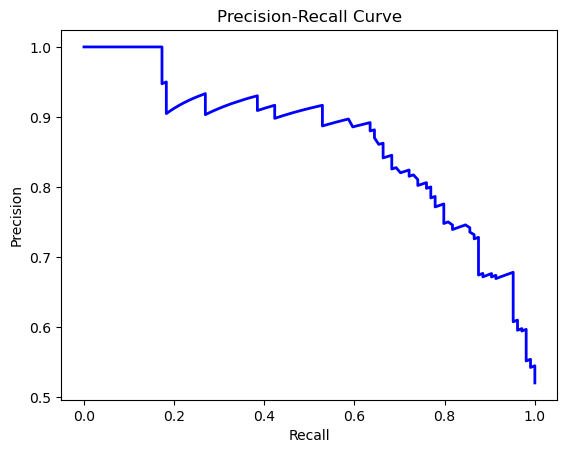

In [68]:
# Hyperparameter Tuning for Naive Bayes
param_grid_nb = {'alpha': [0.1, 0.5, 1.0, 1.5, 2.0]}
grid_search_nb = GridSearchCV(classifier, param_grid_nb, cv=5, scoring='accuracy')
grid_search_nb.fit(X_train, y_train)

# Get the best Naive Bayes classifier from the tuning
best_classifier_nb = grid_search_nb.best_estimator_

# Use the tuned Naive Bayes classifier for precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, best_classifier_nb.predict_proba(X_test)[:, 1])

# Plot the precision-recall curve
plt.plot(recall, precision, color='blue', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()


# ROC Curve and AUC

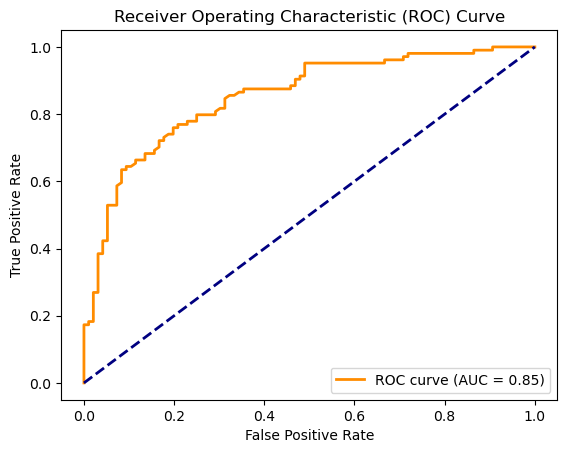

In [69]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, _ = roc_curve(y_test, classifier.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


# Hyperparameter Tuning

In [70]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB

# Creating an instance of the Multinomial Naive Bayes classifier
classifier = MultinomialNB()

# Defining the hyperparameter grid to search
param_grid = {'alpha': [0.5, 1.0, 1.5, 2.0, 2.5]}

# Creating GridSearchCV object
grid_search = GridSearchCV(classifier, param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Get the best model
best_classifier = grid_search.best_estimator_

# Make predictions on the test set using the best model
y_pred_tuned = best_classifier.predict(X_test)

# Finally Evaluating the tuned model on the test set
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
print(f'Tuned Model Accuracy: {accuracy_tuned:.2f}')


Best Hyperparameters: {'alpha': 1.0}
Tuned Model Accuracy: 0.78


# Making the Confusion Matrix

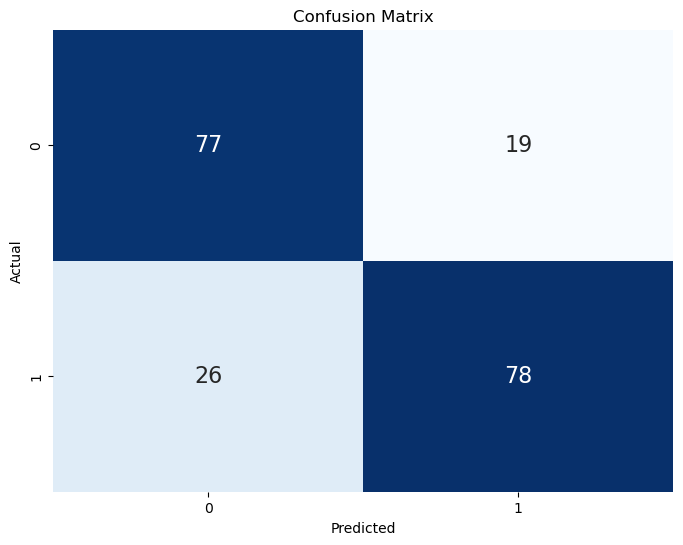

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_tuned)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 16})
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Additional visualizations or analysis
# You can add more visualizations or analysis here based on your specific requirements
